In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(428)


# Problem 1
## 1 & 2

In [2]:
# okay so i forget where the autogradient function is so im going to write it myself, im not sure if that makes me smart or stupid - Mark Viti
def grad(func, h = 1e-5):
    return (func(x_0 + h) - func(x_0 - h)) / (2 * h)

# Write gradient decent function
def gradient_descent(func, step_size_func: callable, epsilon=0.001, x_0: float = 0.0, gradient=None, verbose = False) -> float:
    start_time = time.time()
    counter = 0
    x = x_0
    if gradient is None:
        print("Using numerical gradient")
        g = grad(func, x)
        if verbose:
            print(f"Iteration {counter}: x = {x}, g = {g}")
        while abs(g) > epsilon:
            counter += 1
            step_size = step_size_func(counter)
            if step_size * g > 10:
                step_size = 10 / g
            x -= step_size * g
            g = grad(func, x)
            if verbose:
                print(f"Iteration {counter}: x = {x}, g = {g}")
    else:
        print("Using analytical gradient")
        g = gradient(x)
        if verbose:
            print(f"Iteration {counter}: x = {x}, g = {g}")
        while abs(g) > epsilon:
            counter += 1
            step_size = step_size_func(func = func, counter = counter, x = x, d = -g, grad = grad_function_for_da_pset)
            if step_size * g > 10:
                step_size = 10 / g
            x -= step_size * g
            g = gradient(x)
            if verbose:
                print(f"Iteration {counter}: x = {x}, g = {g}")
    elapsed_time = time.time() - start_time
    print(f"Converged in {counter} iterations. Time taken: {elapsed_time} seconds.")
    return x, counter, elapsed_time

# Define step size functions

def constant_step_size(gamma: float = 0.01, **kwargs) -> float:
    return gamma

def decreasing_step_size(**kwargs) -> float:
    return 1 / (kwargs['counter'] + 1)

# can you use unicode charaters in python? - Mark Viti
def backtracking_line_search(func, grad, counter, x, d, alpha=0.01, λ=0.9, start=1, **kwargs):
    lam = start
    while func(x + lam * d) > func(x) + alpha * lam * np.dot(grad(x), d):
        lam *= λ
    return lam

## 3

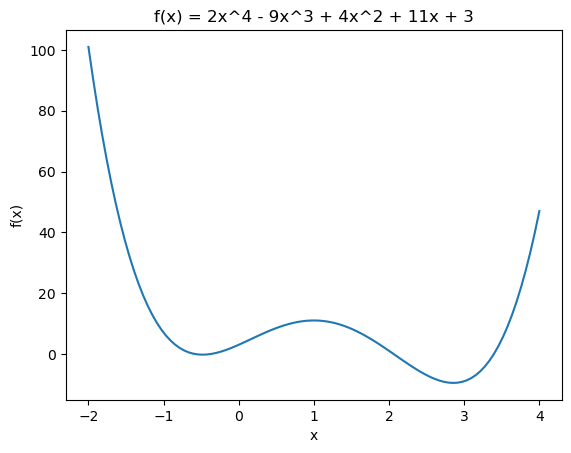

In [3]:
def function_for_da_pset(x):
    return 2*x**4 - 9*x**3 + 4*x**2 + 11*x + 3

# I am now realizing that the autograd function was a poor idea
def grad_function_for_da_pset(x):
    return 8*x**3 - 27*x**2 + 8*x + 11

# Graph the function on [-2, 4]
x = np.linspace(-2, 4, 100)
y = function_for_da_pset(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = 2x^4 - 9x^3 + 4x^2 + 11x + 3')
plt.show()

No, the function is not convex in that interval

In [4]:
# Run gradient descent constant step size
constant_x, constant_counter, constant_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=constant_step_size, x_0 = -2, verbose=False)

# Run gradient descent with decreasing step size
decreasing_x, decreasing_counter, decreasing_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=decreasing_step_size, x_0 = -2, verbose=False)

# Run gradient descent with backtracking line search
backtracking_x, backtracking_counter, backtracking_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=backtracking_line_search, x_0 = -2, verbose=False)

# display cute little table of results 
print("\nResults:")
print("Constant step size:")
print(f"x = {constant_x}, iterations = {constant_counter}, time = {constant_time}")
print("Decreasing step size:")
print(f"x = {decreasing_x}, iterations = {decreasing_counter}, time = {decreasing_time}")
print("Backtracking line search:")
print(f"x = {backtracking_x}, iterations = {backtracking_counter}, time = {backtracking_time}")

Using analytical gradient
Converged in 21 iterations. Time taken: 0.00037288665771484375 seconds.
Using analytical gradient
Converged in 31 iterations. Time taken: 5.0067901611328125e-05 seconds.
Using analytical gradient
Converged in 90 iterations. Time taken: 0.023061752319335938 seconds.

Results:
Constant step size:
x = -0.4813622130992625, iterations = 21, time = 0.00037288665771484375
Decreasing step size:
x = -0.4813953162531252, iterations = 31, time = 5.0067901611328125e-05
Backtracking line search:
x = 2.8563600154389786, iterations = 90, time = 0.023061752319335938


Notice that the constant step size and the decreasing step size both run very quickly, while the line search method is relatively very slow. Moreover, these two methods require fewer iterations than the line search method. However, this problem is very simple and we are starting very close to the minimum, so the line search method is not able to show its potential.

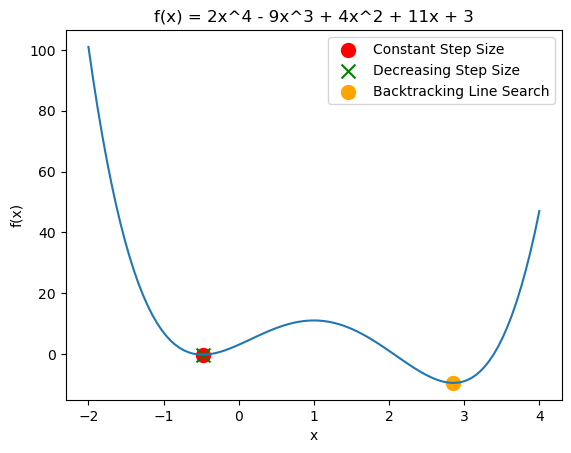

In [5]:
# Graph where they all ended up 
x = np.linspace(-2, 4, 100)
y = function_for_da_pset(x)
plt.plot(x, y)
plt.scatter(constant_x, function_for_da_pset(constant_x), label="Constant Step Size", marker='o', color = 'red', s = 100)
plt.scatter(decreasing_x, function_for_da_pset(decreasing_x), label="Decreasing Step Size", marker = 'x', color = 'green', s = 100)
plt.scatter(backtracking_x, function_for_da_pset(backtracking_x), label="Backtracking Line Search", s = 100, color = 'orange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = 2x^4 - 9x^3 + 4x^2 + 11x + 3')
plt.legend()
plt.show()

Let's vary the starting point to see if it matters. Let's start at 4 instead. 

In [6]:
# Run gradient descent constant step size
constant_x, constant_counter, constant_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=constant_step_size, x_0 = 4, verbose=False)

# Run gradient descent with decreasing step size
decreasing_x, decreasing_counter, decreasing_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=decreasing_step_size, x_0 = 4, verbose=False)

# Run gradient descent with backtracking line search
backtracking_x, backtracking_counter, backtracking_time = gradient_descent(function_for_da_pset, gradient=grad_function_for_da_pset, step_size_func=backtracking_line_search, x_0 = 4, verbose=False)

# display cute little table of results 
print("\nResults:")
print("Constant step size:")
print(f"x = {constant_x}, iterations = {constant_counter}, time = {constant_time}")
print("Decreasing step size:")
print(f"x = {decreasing_x}, iterations = {decreasing_counter}, time = {decreasing_time}")
print("Backtracking line search:")
print(f"x = {backtracking_x}, iterations = {backtracking_counter}, time = {backtracking_time}")

Using analytical gradient
Converged in 14 iterations. Time taken: 0.0004069805145263672 seconds.
Using analytical gradient
Converged in 114 iterations. Time taken: 0.00013971328735351562 seconds.
Using analytical gradient
Converged in 83 iterations. Time taken: 0.014620304107666016 seconds.

Results:
Constant step size:
x = 2.856365102806799, iterations = 14, time = 0.0004069805145263672
Decreasing step size:
x = 2.8563586546813102, iterations = 114, time = 0.00013971328735351562
Backtracking line search:
x = 2.8563976357108136, iterations = 83, time = 0.014620304107666016


Clearly, we have can see that we converge to a different point than when we started at $-2$. Thus, the starting point matters. 

# Problem 2
## Part 1
We have that $g_{x, y} = y - \sum_{i=1}^{n} x_i\beta_j$. Then, let $\beta_1, \beta_2 \in \mathbb{R}^p$ be arbitrary. Moreover, let $\lambda \in [0, 1]$ be arbitrary. Then we have all of the following by linearity: 
$\begin{align}
g_{x, y}(\lambda \beta_1 + (1 - \lambda)\beta_2) &= y - \left[\sum_{i=1}^{n} x_i(\lambda \beta_{1i} + (1 - \lambda)\beta_{2i})\right] \\
& = y - \left[\sum_{i = 1}^n x_i\lambda \beta_{1i} + \sum_{i = 1}^n x_i(1 - \lambda)\beta_{2i} \right]\\
& = y - \sum_{i=1}^{n} \lambda(x_i(\beta_{1i})) + y - \sum_{i=1}^{n} (1 - \lambda)(x_i(\beta_{2i})) \\
& = \lambda \left(y - \sum_{i = 1}^n x_i\beta_{1i} \right) +  (1 - \lambda)\left(y - \sum_{i = 1}^n \beta_{2i}\right)\\
& = \lambda g_{x, y}(\beta_1) + (1 - \lambda)g_{x, y}(\beta_2)
\end{align}$

Based on the definition given in class, we have that $g_{x, y}$ is a convex function. $\blacksquare$

## Part 2
Let $h(z) = z^2$. Then, for $\lambda \in [0, 1]$, we have 
$\begin{align}
h(\lambda z_1 + (1 - \lambda) z_2) & = (\lambda z_1 + (1 - \lambda) z_2)^2 \\
& = \lambda^2 z_1^2 + 2\lambda(1 - \lambda)z_1z_2 + (1 - \lambda)^2z_2^2
\end{align}$
Now, we want to compare this to $\lambda h(z_1) + (1 - \lambda)h(z_2)$. Note that this side is just equal to 
$\begin{align}
\lambda h(z_1) + (1 - \lambda)h(z_2) & = \lambda z_1^2 + (1 - \lambda)z_2^2
\end{align}$
Now, to compare these functions, we will subtract the first from the second:
$\begin{align}
\lambda z_1^2 + (1 - \lambda)z_2^2 - \left(\lambda^2 z_1^2 + 2\lambda(1 - \lambda)z_1z_2 + (1 - \lambda)^2z_2^2\right) \\
& = \lambda z_1^2 - \lambda^2 z_1^2 + (1 - \lambda)z_2^2 - (1 - \lambda)^2z_2^2 - 2\lambda(1 - \lambda)z_1z_2 \\
& = (\lambda - \lambda^2)z_1^2 + ((1 - \lambda) - (1 - \lambda)^2)z_2^2 - 2\lambda(1 - \lambda)z_1z_2 \\
& = \lambda(1 - \lambda)(z_1^2 + z_2^2 - 2z_1z_2) \\
& = \lambda(1 - \lambda)(z_1 - z_2)^2
& \geq 0
\end{align}$
Note that the last inequality holds because $\lambda \in [0, 1]$ and $(z_1 - z_2)^2 \geq 0$. Thus, we have shown that 
$\lambda z_1^2 + (1 - \lambda)z_2^2 \geq \lambda^2 z_1^2 + 2\lambda(1 - \lambda)z_1z_2 + (1 - \lambda)^2z_2^2$ which is the definition of convexity. Thus, we have shown that $h(z) = z^2$ is a convex function. $\blacksquare$

## Part 3
We now define the function $q_{x, y}(\beta) = h(g_{x, y}(\beta))$. We want to show that $q_{x, y}$ is a convex function.
Notice first that $q_{x, y}(\beta) = h(y - \sum_{i=1}^{n} x_i\beta_i)$. We know that $g_{x, y}(\beta)$ maps from $\mathbb{R}^n \to \mathbb{R}$. We have shown that $h(z)$ is convex over the reals. Thus, for any fixed $x \in \mathbb{R}^p$ and $y \in \mathbb{R}$, we can let $g_{x, y}(\beta) = z$ and then we have that $q_{x, y}(\beta) = h(z)$. Of course since $h(z)$ is convex, we have that $q_{x, y}(\beta)$ is convex. $\blacksquare$

## Part 4
Let $s$ and $r$ be arbitrary convex functions such that $r: \mathbb{R}^p \to \mathbb{R}$ and $s: \mathbb{R}^p \to \mathbb{R}$. Then, we want to show that $t(w) = r(w) + s(w)$ is convex.

Notice first since both $r$ and $s$ are convex, we have that for any $\lambda \in [0, 1]$, we have that
$\begin{align}
r(\lambda w_1 + (1 - \lambda)w_2) & \leq \lambda r(w_1) + (1 - \lambda)r(w_2) \\
s(\lambda w_1 + (1 - \lambda)w_2) & \leq \lambda s(w_1) + (1 - \lambda)s(w_2)
\end{align}$
Now, we can just add. We have that
$\begin{align}
r(\lambda w_1 + (1 - \lambda)w_2) + s(\lambda w_1 + (1 - \lambda)w_2) & \leq \lambda r(w_1) + (1 - \lambda)r(w_2) + \lambda s(w_1) + (1 - \lambda)s(w_2) \\
r(\lambda w_1 + (1 - \lambda)w_2) + s(\lambda w_1 + (1 - \lambda)w_2) & \leq \lambda(r(w_1) + s(w_1)) + (1 - \lambda)(r(w_2) + s(w_2)) \\
t(\lambda w_1 + \lambda w_2) & \leq \lambda t(w_1) + (1 - \lambda)t(w_2)
\end{align}$
And so we have shown that $t(w) = r(w) + s(w)$ is convex. $\blacksquare$

## Part 5
We will now will use the previous result to show that for a finite number of convex functions $v_i$ that the sum 
$\begin{align}
v(z) & = \sum_{i = 1}^n v_i(z)
\end{align}$
is convex.

Clearly, we can just use induction. We won't even consider the $n = 1$ case since it is trivial. 

**Base Case**:
Let $n = 2$. Then, we have that $v(z) = v_1(z) + v_2(z)$. We have shown that the sum of two convex functions is convex in 4. Thus, we have that $v(z)$ is convex.

**Inductive Step**:
Assume that for some $n = k$, we have that $v(z) = \sum_{i = 1}^k v_i(z)$ is convex. We want to show that for $n = k + 1$, we have that $v(z) = \sum_{i = 1}^{k + 1} v_i(z)$ is convex. Now, the sum would just be 
$\begin{align}
\sum_{i = 1}^{k + 1} v_i(z) & = \underbrace{\sum_{i = 1}^k v_i(z)}_\text{convex} + \underbrace{v_{k + 1}(z)}_\text{convex}
\end{align}$
Which is just the sum of two convex functions. We have shown that the sum of two convex functions is convex. Our inductive step holds. 

Thus, by our base case and inductive step, we know from induction that for any $n \in \mathbb{N}$, the sum of $n$ convex functions is convex. $\blacksquare$

## Part 6
We will now show that the function $f(\beta) = \sum_{i=1}^n\left(y_i - \sum_{j = 1}^px_{i , j}^T\beta_j\right)^2$ is convex.

Note that we can rewrite $f(\beta)$ as
$\begin{align}
f(\beta) & = \sum_{i=1}^n q_{x_i, y_i}(\beta)
\end{align}$
Then by 3, we have that $q_{x_i, y_i}(\beta)$ is convex. Then, by 5, we have that the sum of $n$ convex functions is convex. Thus, we have that $f(\beta)$ is convex. $\blacksquare$

## Part 7
It is very useful that the OLS problem is convex since we can use gradient descent to solve it. This is because we know that the OLS problem is convex, so we know that the gradient descent algorithm will converge to the global minimum. This is because the gradient descent algorithm is guaranteed to converge to the global minimum for convex functions. Moreover, we have interior point methods, Newton-Raphson, and other methods that are guaranteed to converge to the global minimum for convex functions. Thus, we can use these methods to solve the OLS problem very easily. If the problem was not convex, then the problem might be NP-hard, and we would not have any good algorithms to solve it. Thus, it is very useful that the OLS problem is convex. $\blacksquare$

# Problem 3
## Part 1
Optimization is relevant for machine learning because we always need to fit our model to some data set. This process is inherently an optimization problem where we use some loss function (some marker on how well our model fits our data) to choose between different model weights. As the size and complexity of the data set and the model architecture grows, this optimization problem becomes more and more difficult. Simple problems like OLS can be solved by convex methods that have many analytical guarantees and are relatively simple to implement. However, as the problem becomes more complex, we need to use more complex optimization methods. For very complicated problems, the problem need not be convex, and therefore we need to use more complex methods like stochastic gradient descent, Newton-Raphson, and interior point methods. In any case, optimization is a core of part of machine learning as it is the tool which selects the model weights over the set of all possible weights. $\blacksquare$

## Part 2
We will consider the model $Y = f(X) + U$ such that $U$ is independent of $X$ and that the variance of $U$ us some $\sigma > 0$. Now, we want to model $Y$. Clearly, if we pick that dataset with $\left(X_i, f(X_i)\right)$, we will not have any information about $U$ since $U$ is independent of $X$. For the sake of argument, let's say that the variance of $U$ is much larger than the outputs of the function $f(X)$. Then, modeling $f(X)$ very well does not help us understand $Y$ since we have no information about $U$. Thus, we need to have information about $U$ in order to model $Y$. Therefore, we want to pick that dataset with $\left(X_i, Y_i\right)$ since this dataset contains information about $U$. 

Another way to see this result is to consider the bias-variance tradeoff of $\left(X_i, f(X_i)\right)$. We can see that we would be biased in our model since we would not have any information about $U$. The variance might be very small (assuming $f(X)$ does not have a large random term), but our model might be so biased that it doesn't matter how small the variance is. On the other hand, the dataset $\left(X_i, Y_i\right)$ has a larger variance, but we have information about $U$, but we aren't biased. Thus, we can see that the bias-variance tradeoff is better for $\left(X_i, Y_i\right)$. Note that it is hard to say which has a better MSE since the variance of $U$ is unknown, but given this limited information, it is better to at least have the information about $U$ in our dataset.
$\blacksquare$

## Part 3
Let $x, y \in \mathbb{R}^p$. Then, let $\lambda \in [0, 1]$. Finally, let $f$ be some norm. Then, by the norm properties, we have that 
$\begin{align}
0 \leq f(\lambda x + (1 - \lambda) y) & \leq f(\lambda x) + f((1 - \lambda)y) && \text{Triangle Inequality}\\
& = \lambda f(x) + (1 - \lambda)f(y) && \text{Property c} \\
\implies 0 \leq f(\lambda x + (1 - \lambda) y) & \leq \lambda f(x) + (1 - \lambda)f(y)
\end{align}$
And so, we have shown that any norm is convex. $\blacksquare$

## Part 4
Consider some function that we want to maximize $f: \mathbb{R}^p \to \mathbb{R}$. We want to show that this maximization problem is equivalent to a minimization problem.

Let $g: \mathbb{R}^p \to \mathbb{R}$ be defined as $g(x) = -f(x)$. Then, we have that $g$ is just the negative of $f$. Then, we have that
$\begin{align}
\max_{x \in \mathbb{R}^p} f(x) & = \max_{x \in \mathbb{R}^p} -g(x)
\end{align}$
Now, this maximization problem is just attempting to find the point $x$ such that $-g(x) \geq -g(y)$ for all alternatives $y$. Now, we can just multiply both sides by $-1$ to get that we are trying to find the point $x$ such that $g(x) \leq g(y)$ for all alternatives $y$. This is just the definition of the minimization problem. So, 
$\begin{align}
\max_{x \in \mathbb{R}^p} f(x) & = \max_{x \in \mathbb{R}^p} -g(x) \\
& = \min_{x \in \mathbb{R}^p} g(x)
\end{align}$
Thus, we have shown that the maximization problem is equivalent to a minimization problem. Specifically, it is the minimization of the negative of the function we are trying to maximize. $\blacksquare$